In [0]:
os.chdir('/content/drive/My Drive/')
!pwd
#os.mkdir('DataScience')
os.chdir('DataScience')
os.mkdir('PlantDisease')

!ls

In [0]:
import random 
import shutil
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop, Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras import metrics
import os
SEED=123
os.listdir()
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
from google.colab import files
files.upload()  

In [0]:
!ls -lha kaggle.json

In [0]:
!pip install -q kaggle

In [0]:
# The Kaggle API client expects this file to be in ~/.kaggle,
# so move it there.
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# This permissions change avoids a warning on Kaggle tool startup.
!chmod 600 ~/.kaggle/kaggle.json

In [0]:
!kaggle datasets list -s plants


In [0]:
!kaggle datasets download -d emmarex/plantdisease

In [0]:
!unzip plantdisease.zip

In [0]:
!pwd

In [0]:
#Checking length of each disease type
os.chdir('/content/drive/My Drive/DataScience/PlantVillage/')
print(len(os.listdir('Pepper__bell___Bacterial_spot')))
print(len(os.listdir('Pepper__bell___healthy')))
print(len(os.listdir('Potato___Early_blight')))
print(len(os.listdir('Potato___Late_blight')))
print(len(os.listdir('Potato___healthy')))
print(len(os.listdir('Tomato_Bacterial_spot')))
print(len(os.listdir('Tomato_Early_blight')))
print(len(os.listdir('Tomato_Late_blight')))
print(len(os.listdir('Tomato_Leaf_Mold')))
print(len(os.listdir('Tomato_Septoria_leaf_spot')))
print(len(os.listdir('Tomato_Spider_mites_Two_spotted_spider_mite')))
print(len(os.listdir('Tomato__Target_Spot')))
print(len(os.listdir('Tomato__Tomato_YellowLeaf__Curl_Virus')))
print(len(os.listdir('Tomato__Tomato_mosaic_virus')))
print(len(os.listdir('Tomato_healthy')))

In [0]:
base_dir='/content/drive/My Drive/DataScience/PlantVillage/'
os.chdir(base_dir)
os.mkdir('dataset')
os.mkdir('training')
os.mkdir('validation')
os.chdir('dataset')

In [0]:
os.chdir(base_dir)
os.listdir()
os.chdir('dataset')
os.system('scp -r ../Tom* ../Pepper* ../Potato* .')

In [0]:
classes = os.listdir()
for i in classes:
    tr_dir = os.path.join('/content/drive/My Drive/DataScience/PlantVillage/training',i)
    val_dir = os.path.join('/content/drive/My Drive/DataScience/PlantVillage/validation',i)
    
    os.mkdir(tr_dir)
    os.mkdir(val_dir)
    
    

In [0]:
# Checking

print(os.listdir('/content/drive/My Drive/DataScience/PlantVillage/training'))


print(os.listdir('/content/drive/My Drive/DataScience/PlantVillage/validation'))


In [0]:
print(classes)
import random
print(os.getcwd())
sumval=0
sumtrain=0
for item in classes:
    
    n_val = round(len(os.listdir(item))*.04) #counting number of validation entries
    n_train = round(len(os.listdir(item))*.2) #conuting number of training entries
    fnames = os.listdir(item)
    sumval = sumval+n_val
    sumtrain = sumtrain+n_train
        
    #assert(n_val+n_train == len(fnames))

    random.seed(SEED+5)
    random.shuffle(fnames)
    val_fnames = fnames[0:n_val]
    tr_fnames = fnames[n_val:n_val+n_train] #for a smaller dataset
    #tr_fnames = fnames[n_val:len(fnames)]

    #assert(len(val_fnames)+len(tr_fnames)==len(fnames))

    for i in val_fnames:
        src ='/content/drive/My Drive/DataScience/PlantVillage/dataset/{}/{}'.format(item,i)
        dest = '/content/drive/My Drive/DataScience/PlantVillage/validation/{}/'.format(item)
        shutil.copy(src,dest)
        
    for j in tr_fnames:
        src ='/content/drive/My Drive/DataScience/PlantVillage/dataset/{}/{}'.format(item,j)
        dest = '/content/drive/My Drive/DataScience/PlantVillage/training/{}/'.format(item)
        shutil.copy(src,dest)      
print(sumval,sumtrain)



In [0]:
for i in classes:
    path=os.path.join('/content/drive/My Drive/DataScience/PlantVillage/training/',i)
    print('Training samples in {} is {}'.format(i,len(os.listdir(path))))
    
    path=os.path.join('/content/drive/My Drive/DataScience/PlantVillage/validation/',i)
    print('Validation samples in {} is {}\n'.format(i,len(os.listdir(path))))
    
##Removing class files from the base directory
os.system('rm -r /content/drive/My Drive/DataScience/PlantVillage/Tom* /content/drive/My Drive/DataScience/PlantVillage/Pepper* /content/PlantVillage/Potato* .')

In [0]:
validation_dir = '/content/drive/My Drive/DataScience/PlantVillage/validation/'
training_dir = '/content/drive/My Drive/DataScience/PlantVillage/training/'

In [0]:
from tensorflow.keras import layers
from tensorflow.keras import Model

from tensorflow.keras import applications


# Downloading the pretrained model


from tensorflow.keras.applications.inception_v3 import InceptionV3


#Initialising the model with inbuilt InceptionV3
pre_trained_model = InceptionV3(input_shape = (256, 256, 3), 
                                weights='imagenet',
                                include_top = False, 
                                )


#Setting the layers as not trainable, as we want it to use the pretrained weights during epochs
for layer in pre_trained_model.layers:
  layer.trainable = False
  

pre_trained_model.summary()

#Pointing towards a stage in the model (refer Summary), we are telling that last_layer will be the 'mixed6' layer, similarly we assign the last output which need not be trained
last_layer = pre_trained_model.get_layer('mixed6') #Tried mixed7
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

In [0]:
## Adding our paramaters to the model

class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('val_acc')>0.97):
            print("\nReached 97% validation accuracy so cancelling training!")
            self.model.stop_training = True

from tensorflow.keras.optimizers import RMSprop

from tensorflow.keras.optimizers import Adam
# Flatten the output layer to 1 dimension

 

x = layers.Conv2D(256,(3,3),activation='relu')(last_output)
x = layers.BatchNormalization(axis=-1)(x)
x = layers.MaxPooling2D(2, 2)(x)

x = layers.GlobalAveragePooling2D()(last_output)

x = layers.Dropout(0.5)(x)

'''

x = layers.GlobalAveragePooling2D()(x)
x = layers.Conv2D(128,(3,3),activation='relu')(x)
x = layers.layers.BatchNormalization(axis=-1)(x)
x = layers.MaxPooling2D(2, 2)(x)


x = layers.GlobalAveragePooling2D()(x)
x = layers.Conv2D(64,(3,3),activation='relu')(x)
x = layers.layers.BatchNormalization(axis=-1)(x)
x = layers.MaxPooling2D(2, 2)(x)
'''
x = layers.Flatten()(x)
# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = layers.Dense(1024, activation='relu')(x)
# Add a dropout rate of 0.3
x = layers.Dense(1024, activation='relu')(x)

x = layers.Dense(512, activation='relu')(x)

x = layers.Dropout(0.5)(x)                  
# Add a final softmax layer for classification into 15 categories
x = layers.Dense(15, activation='softmax')(x)           

model = Model( pre_trained_model.input, x) 

def top_3_categ_acc(y_pred,y_true):
    return metrics.top_k_categorical_accuracy(y_true, y_pred, k=3)

def top_5_categ_acc(y_pred,y_true):
    return metrics.top_k_categorical_accuracy(y_true, y_pred, k=5)

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=1e-3),
              metrics=[categorical_accuracy])#,top_3_categ_acc,top_5_categ_acc])

train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=90,
      #width_shift_range=0.5,
      #height_shift_range=0.5,
      #shear_range=0.4,
      #zoom_range=0.2,
      horizontal_flip=True,
      #vertical_flip=True,
      fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 100 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        training_dir,  # This is the source directory for training images
        target_size=(256, 256),  # All images will be resized to 256x256
        batch_size=128,
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(256, 256),
        batch_size=128,
        class_mode='categorical')

callbacks = myCallback()

history = model.fit_generator(
      train_generator,
      steps_per_epoch=32,  # 16512 images = batch_size * steps
      epochs=200,
      validation_data=validation_generator,
      validation_steps=7,  # 4126 images = batch_size * steps
      verbose=1,
      callbacks = [callbacks])

In [0]:
#Simple Deep Learning Architecture
from keras import Sequential
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.optimizers import Adam
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('val_acc')>0.97):
            print("\nReached 97% validation accuracy so cancelling training!")
            self.model.stop_training = True



model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(256, 256, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.BatchNormalization(axis=-1),
    
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.BatchNormalization(axis=-1),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.BatchNormalization(axis=-1),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.BatchNormalization(axis=-1),
    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.BatchNormalization(axis=-1),

    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Conv2D(512, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.BatchNormalization(axis=-1),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(15, activation='softmax')
])


model.compile(loss='binary_crossentropy',
              optimizer=Adam(lr=1e-4,decay=1e-4/130),
              metrics=['categorical_accuracy'])#,top_3_categ_acc,top_5_categ_acc])

train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=90,
      width_shift_range=0.5,
      height_shift_range=0.5,
      shear_range=0.4,
      zoom_range=0.2,
      horizontal_flip=True,
      #vertical_flip=True,
      fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 100 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        training_dir,  # This is the source directory for training images
        target_size=(256, 256),  # All images will be resized to 256x256
        batch_size=32,
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(256, 256),
        batch_size=32,
        class_mode='categorical')

callbacks = myCallback()

history = model.fit_generator(
      train_generator,
      steps_per_epoch=130,  # 16512 images = batch_size * steps
      epochs=200,
      validation_data=validation_generator,
      validation_steps=26,  # 4126 images = batch_size * steps
      verbose=1,
      #callbacks = [callbacks]
      )

Found 4127 images belonging to 15 classes.
Found 825 images belonging to 15 classes.
Epoch 1/200
130/130 [==============================] - 75s 578ms/step - loss: 0.2111 - categorical_accuracy: 0.3272 - val_loss: 0.2799 - val_categorical_accuracy: 0.1552
Epoch 2/200
130/130 [==============================] - 73s 560ms/step - loss: 0.1661 - categorical_accuracy: 0.4600 - val_loss: 0.4617 - val_categorical_accuracy: 0.1030
Epoch 3/200
130/130 [==============================] - 73s 563ms/step - loss: 0.1534 - categorical_accuracy: 0.5061 - val_loss: 0.3974 - val_categorical_accuracy: 0.1067
Epoch 4/200
130/130 [==============================] - 73s 561ms/step - loss: 0.1442 - categorical_accuracy: 0.5371 - val_loss: 0.3207 - val_categorical_accuracy: 0.2339
Epoch 5/200
130/130 [==============================] - 73s 563ms/step - loss: 0.1343 - categorical_accuracy: 0.5811 - val_loss: 0.1899 - val_categorical_accuracy: 0.4642
Epoch 6/200
130/130 [==============================] - 73s 559ms/

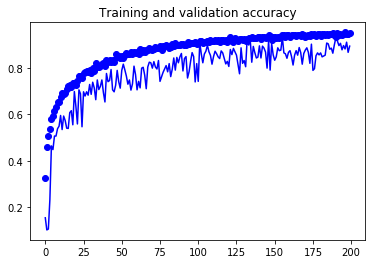

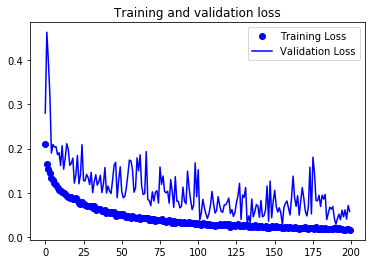

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
acc = history.history['categorical_accuracy']
val_acc = history.history['val_categorical_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

acc_l= pd.DataFrame(acc)
val_acc_l=pd.DataFrame(val_acc)

acc_l.to_csv('accuracy.csv')
val_acc_l.to_csv('val_acc.csv')


model.save('DeepLearn.h5')
model.save_weights('DeepLearn_Weights.h5')


In [0]:
from google.colab import drive
drive.mount('/content/drive')

In [0]:
plt.savefig('plot')

<Figure size 432x288 with 0 Axes>

In [0]:
import numpy as np
import pickle
import cv2
from os import listdir
from sklearn.preprocessing import LabelBinarizer
from keras.models import Sequential
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation, Flatten, Dropout, Dense
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.preprocessing import image
from keras.preprocessing.image import img_to_array
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt



model = Sequential()
chanDim = -1;
model.add(Conv2D(32, (3, 3), padding="same",input_shape=(256,256,3)))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(Conv2D(128, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(1024))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(15))
model.add(Activation("softmax"))

model.compile(loss="binary_crossentropy", optimizer=Adam(lr=1e-3),metrics=["accuracy"])

train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=90,
      #width_shift_range=0.5,
      #height_shift_range=0.5,
      #shear_range=0.4,
      #zoom_range=0.2,
      horizontal_flip=True,
      #vertical_flip=True,
      fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 100 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        training_dir,  # This is the source directory for training images
        target_size=(256, 256),  # All images will be resized to 256x256
        batch_size=128,
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(256, 256),
        batch_size=128,
        class_mode='categorical')

callbacks = myCallback()

history = model.fit_generator(
      train_generator,
      steps_per_epoch=32,  # 16512 images = batch_size * steps
      epochs=200,
      validation_data=validation_generator,
      validation_steps=7,  # 4126 images = batch_size * steps
      verbose=1)

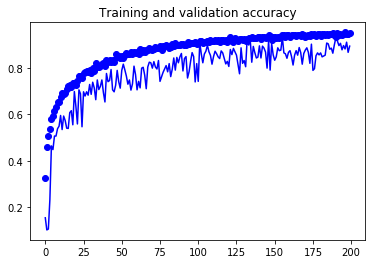

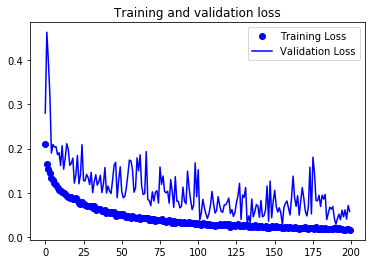

In [0]:

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.savefig('AccPlot.png')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()
plt.savefig('LossPlot.png')
plt.show()

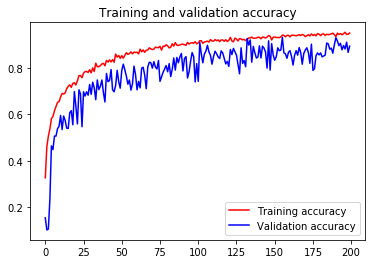

<Figure size 432x288 with 0 Axes>

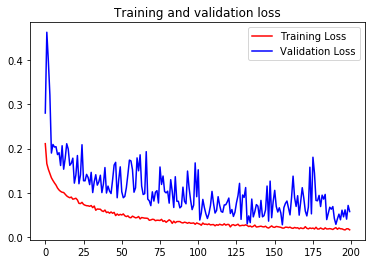

In [0]:
import matplotlib.pyplot as plt

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)

plt.savefig('AccPlot.png',dpi=200)
plt.figure()




plt.show()


plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.savefig('LossPlot.png',dpi=200)
plt.show()





In [0]:
!scp DeepLearn* *.png drive/My\ Drive/DataScience/PlantVillage

In [0]:
!scp *.csv drive/My\ Drive/DataScience/PlantVillage

In [0]:
%load_ext google.colab.data_table

from vega_datasets import data
data.cars()

,Acceleration,Cylinders,Displacement,Horsepower,Miles_per_Gallon,Name,Origin,Weight_in_lbs,Year
0,12.0,8,307.0,130.0,18.0,chevrolet chevelle malibu,USA,3504,1970-01-01
1,11.5,8,350.0,165.0,15.0,buick skylark 320,USA,3693,1970-01-01
2,11.0,8,318.0,150.0,18.0,plymouth satellite,USA,3436,1970-01-01
3,12.0,8,304.0,150.0,16.0,amc rebel sst,USA,3433,1970-01-01
4,10.5,8,302.0,140.0,17.0,ford torino,USA,3449,1970-01-01
5,10.0,8,429.0,198.0,15.0,ford galaxie 500,USA,4341,1970-01-01
6,9.0,8,454.0,220.0,14.0,chevrolet impala,USA,4354,1970-01-01
7,8.5,8,440.0,215.0,14.0,plymouth fury iii,USA,4312,1970-01-01
8,10.0,8,455.0,225.0,14.0,pontiac catalina,USA,4425,1970-01-01
9,8.5,8,390.0,190.0,15.0,amc ambassador dpl,USA,3850,1970-01-01


In [0]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

In [0]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

<IPython.core.display.Javascript object>